**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Alexys Martín Coate Reyes
*   MATRÍCULA: A01746998

In [133]:
"""
# No se están leyendo datos desde drive
from google.colab import drive
drive.mount('/content/drive')
"""

"\n# No se están leyendo datos desde drive\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [134]:
import os
# No se está utilizando google drive
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
#os.chdir(DIR)

In [135]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "last"

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

**Columnas Numéricas**
* person_age
* person_income
* person_emp_lenght
* loan_amnt    
* loan_int_rate  
* loan_status   
* loan_percent_income  
* cb_person_cred_hist_length                                                 
     

**Columnas Cualitativas**   
* person_home_ownership       
* loan_intent
* loan_grade  
* cb_person_default_on_file          

**Total Columnas Numéricas = 8**

**Total Columnas Cualitativas = 4**

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

 | Columna                    | Porcentaje|
|:---------------------------|--------:|
| person_age                 | 0 %      |
| person_income              | 0 %      |
| person_home_ownership      | 0 %      |
| person_emp_length          | 2.747 %  |
| loan_intent                | 0 %      |
| loan_grade                 | 0 %      |
| loan_amnt                  | 0 %      |
| loan_int_rate              | 9.56386 %|
| loan_status                | 0 %      |
| loan_percent_income        | 0 %      |
| cb_person_default_on_file  | 0 %      |
| cb_person_cred_hist_length | 0 %      |


In [139]:
df.isnull().mean().to_frame()*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:

*   Tendencia central (media, mediana)

|     | person\_age | person\_income | person\_emp\_length | loan\_amnt | loan\_int\_rate | loan\_status | loan\_percent\_income | cb\_person\_cred\_hist\_length |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| mean | 27.734600 | 6.607485e+04 | 4.789686 | 9589.371106 | 11.011695 | 0.218164 | 0.170203 | 5.804211 |
| Mediana (50%) | 26.000000 | 5.500000e+04 | 4.000000 | 8000.000000 | 10.990000 | 0.000000 | 0.150000 | 4.000000 |


*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)

|     | person\_age | person\_income | person\_emp\_length | loan\_amnt | loan\_int\_rate | loan\_status | loan\_percent\_income | cb\_person\_cred\_hist\_length |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| min | 20.000000 | 4.000000e+03 | 0.000000 | 500.000000 | 5.420000 | 0.000000 | 0.000000 | 2.000000 |
| max | 144.000000 | 6.000000e+06 | 123.000000 | 35000.000000 | 23.220000 | 1.000000 | 0.830000 | 30.000000 |
| std | 6.348078 | 6.198312e+04 | 4.142630 | 6322.086646 | 3.240459 | 0.413006 | 0.106782 | 4.055001 |
| 25% | 23.000000 | 3.850000e+04 | 2.000000 | 5000.000000 | 7.900000 | 0.000000 | 0.090000 | 3.000000 |
| 50% | 26.000000 | 5.500000e+04 | 4.000000 | 8000.000000 | 10.990000 | 0.000000 | 0.150000 | 4.000000 |
| 75% | 30.000000 | 7.920000e+04 | 7.000000 | 12200.000000 | 13.470000 | 0.000000 | 0.230000 | 8.000000 |


*   Forma (asimetría y curtosis)


| |asimetria|
|:----|:----|
|person_age|2.581393|
|person_income|32.865349|
|person_emp_length|2.614455|
|loan_amnt|1.192477|
|loan_int_rate|0.208550|
|loan_status|1.364888|
|loan_percent_income|1.064669|
|cb_person_cred_hist_length|1.661790|

 

| |curtosis|
|:----|:----|
|person_age|18.560825|
|person_income|2693.272776|
|person_emp_length|43.722338|
|loan_amnt|1.423565|
|loan_int_rate|-0.671609|
|loan_status|-0.137088|
|loan_percent_income|1.223687|
|cb_person_cred_hist_length|3.716194|


*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

`person_age`: 
* **Asimetría:** 
    * *Valor:* 2.581393
    * *Tipo:* Sesgo positivo (Positive skew)
    * *Explicación:* Tiene una asimetría positiva, por lo que la moda se concentra en la parte izquierda de los datos y la cola en la derecha. 

* **Curtosis:**
    * *Valor:* 18.560825
    * *Tipo:* Leptokurtic (Leptocúrtica)
    * *Explicación:* La curtosis tiene un valor positivo que no es cercano a 0 (mayor a 3) y por lo tanto es "Leptocúrtica". La mayoría de los valores se concentran alrededor de la media.


`loan_int_rate`: 
* **Asimetría:**
    * *Valor:* 0.208550
    * *Tipo:* Simétrica (Symetrical distribution)
    * *Explicación:* Los valores son < 0.5, por lo que es simétrica. Los datos se concentran como una campana de gauss

* **Curtosis:** 
    * *Valor:* -0.671609
    * *Tipo:* Platykurtic (Platicúrtica)
    * *Explicación:* El valor es < 0, por lo que es platicúrtica. Hay una baja concentración de valores en torno a la media y por lo tanto hay más outliers.



**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [140]:
# Obteniendo estadísticas descriptivas
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [141]:
#Filtrado de datos de variables numéricas (Quitar variables cualitativas)
df_num = df.select_dtypes(['float64','int64'])
df_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [142]:
# Obteniendo la asimetria
asimetria = df_num.skew()
asimetria = asimetria.to_frame()
asimetria.columns = ["asimetria"]
asimetria

,asimetria
person_age,2.581393
person_income,32.865349
person_emp_length,2.614455
loan_amnt,1.192477
loan_int_rate,0.208550
loan_status,1.364888
loan_percent_income,1.064669
cb_person_cred_hist_length,1.661790


In [143]:
# Obteniendo la curtosis
curtosis = df_num.kurt()
curtosis = curtosis.to_frame()
curtosis.columns = ["curtosis"]
curtosis

,curtosis
person_age,18.560825
person_income,2693.272776
person_emp_length,43.722338
loan_amnt,1.423565
loan_int_rate,-0.671609
loan_status,-0.137088
loan_percent_income,1.223687
cb_person_cred_hist_length,3.716194


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**Respuesta**

`person_age`: En este caso coincide 100% con el gráfico puesto que la forma de la campana tiene un sesgo a la derecha (positive skew)

`loan_int_rate`: La asimetría nos dice que tiene forma muy cercana a la de una campana, pero los datos y el análisis KDE nos dicen algo distinto, teniendo en realidad 2 la forma de la suma de 2 campanas con una estimación más precisa. En caso de que se modifiquen los valores para considerar 1 campana, entonces los datos están ligeramente sesgados a la izquierda.

`person_income`: Tiene una asimetria positiva o sesgo a la derecha lo cual coincide con el valor de la tabla de 32.865349.

`person_emp_length`: Tienen una asimetría positiva o sesgo a la derecha igual que en el histograma, con un valor de la tabla de 2.614455

`loan_amnt`: Se aplicó un KDE tophat, sin embargo se muestra una clara tendencia a los datos a estar mayormente en la parte izquierda con un sesgo positivo y un valor de tabla de 1.192477 confirmando lo observado. 

`loan_status`: Son datos binarios 0 y 1, por lo que están a lados contrarios. Como la mayor cantidades de datos son igual a 0 es lógico que tenga una sesgo positivo. Esto es ejemplificado por un valor de la tabla de 1.364888. 

`loan_percent_income`: Los datos también tienen una tendencia positiva de asimetria y se ve respaldado por el valor de la tabla que es de 1.064669.

`cb_person_cred_hist_length`: Los datos tienen una clara tendencia a acumularse a la izquierda pero grupos de frecuencias más similares. Esto se respalda por la tabla al tener un skew positivo de 1.661790. 

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

In [144]:
# Se hace una lista de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

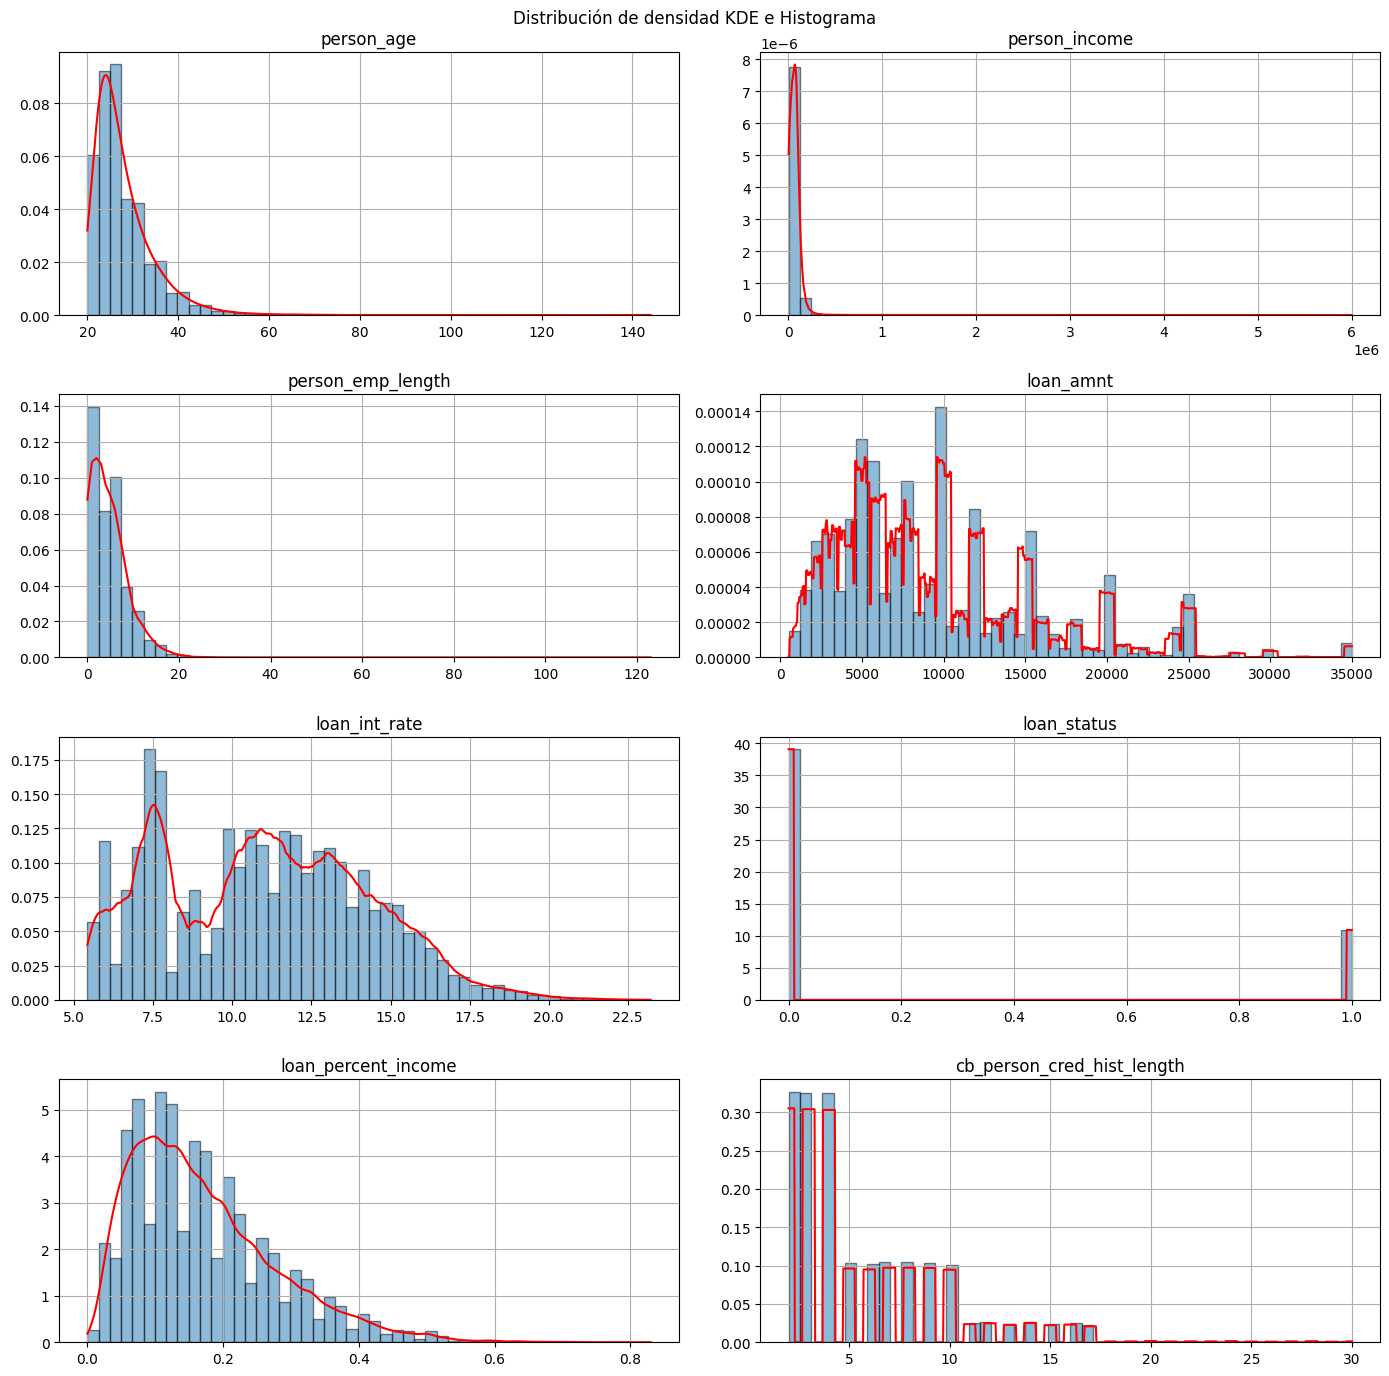

In [145]:
from sklearn.neighbors import KernelDensity

fig, axes = plt.subplots(4,2, figsize=(14,14))      # Crea una figura y una lista de matricez de tamaño 4x2 (filas x col)
axes = axes.ravel()       # Alinea en 1 dimensión la matriz de subplots

# Kernel types = {'exponential', 'gaussian', 'linear', 'tophat', 'epanechnikov', 'cosine'}
kernel = ['gaussian', 'tophat', 'linear', 'tophat', 'cosine', 'tophat', 'gaussian', 'tophat']
bandwith = [2, 60000, 2, 450, 0.7, 0.01, 0.01, 0.3]

for col, ax, krn, bw in zip(df[num_cols], axes, kernel, bandwith):
    
    # Ajuste de datafrmaes en datos de numpy para KDE
    df_KDE = df[col].dropna().values[:, np.newaxis] 
    
    # Ajuste del modelo KDE (Kernel Density)
    kde_col = KernelDensity(kernel=krn, bandwidth=bw)
    kde_col.fit(df_KDE)
    
    # Creación de eje X para dibujar la función del kernel
    col_Xplot = np.linspace(df[col].min(), df[col].max(), 1000)[:, np.newaxis]
    
    # Predicción de la densidad
    log_densidad_col = kde_col.score_samples(col_Xplot)
    # Se aplica exponente para eliminar el logaritmo
    densidad_col = np.exp(log_densidad_col)
    
    # Grafico KDE
    ax.plot(col_Xplot[:, 0], densidad_col, color='red')
    
    # Grafico Histograma
    ax.hist(df[col].dropna(), bins=50, density=True, alpha=0.5, edgecolor="black")
    ax.set_title(str(col))
    ax.grid(True)
    

fig.suptitle("Distribución de densidad KDE e Histograma")
fig.tight_layout()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

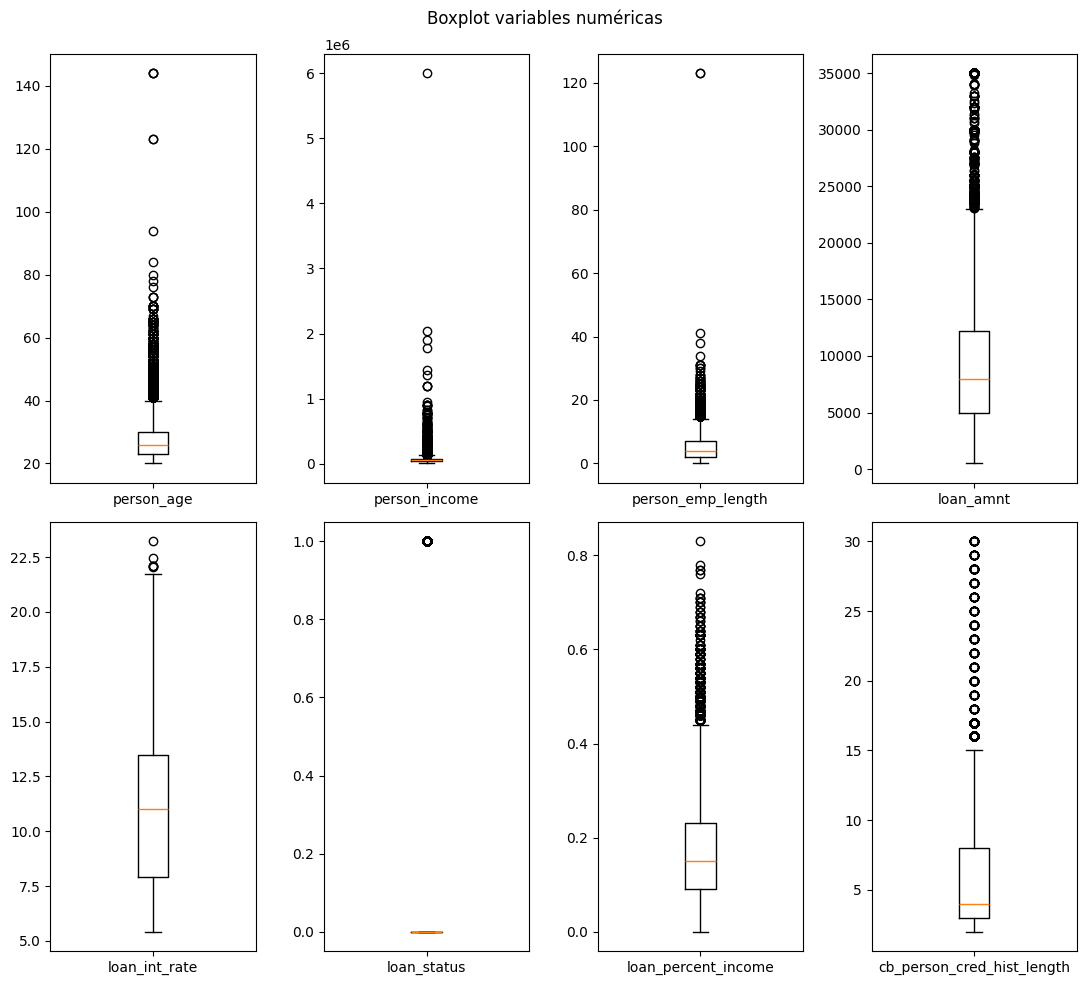

In [146]:
# Creación de gráficas
fig, axes = plt.subplots(2,4, figsize=(11,10)) # Crea una figura y una lista de matricez de tamaño 2x4 (filas x col)
axes = axes.ravel()     # Alinea en 1 dimensión la matriz de subplots

#Graficar el boxplot de cada columna
for col, ax in zip(df[num_cols],axes):
    ax.boxplot(df[col].dropna(), tick_labels=[f'{col}'])
    
fig.suptitle("Boxplot variables numéricas")
fig.tight_layout()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

**Respuesta**

Los valores atípicos o "outliers" los podemos también observar en el boxplot graficados como puntos. Esto significa que las personas mayores de 40 años en adelante son atípicas al momento de pedir préstamos. Esto puede deberse a que en dicha edad se cuenta con una mayor estabilidad económica. 

Así mismo al observar la tabla se puede observar que hay 1494 valores atípicos, entre los cuales tenemos también 5 personas de edad sumamente avanzada llegando hasta los 144 y 123 años, edad que es extremadamente improbable, por no decir imposible de alcanzar. 

In [147]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [148]:
# Verificando edades atípicas de las personas
IQR_outliers.sort_values("person_age").tail(7)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


{'whiskers': [<matplotlib.lines.Line2D at 0x1bfc24895e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfc21e5130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfc2489340>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfc2489580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfc2489970>],
 'means': []}

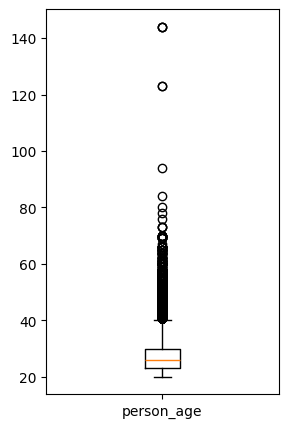

In [149]:
fig = plt.figure(figsize=(3,5))
plt.boxplot(df["person_age"].dropna(), tick_labels=["person_age"])

# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)

| |person_home_ownership|loan_intent|loan_grade|cb_person_default_on_file|
|:----|:----|:----|:----|:----|
|Moda |RENT|EDUCATION|A|N|
|Frecuencia|16446|6453|10777|26836|


*   Cardinalidad (cantidad de valores únicos)

    * person_home_ownership ['RENT', 'OWN', 'MORTGAGE', 'OTHER'] cardinalidad:  4

    * loan_intent ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'] cardinalidad:  6

    * loan_grade ['D', 'B', 'C', 'A', 'E', 'F', 'G'] cardinalidad:  7

    * cb_person_default_on_file ['Y', 'N'] cardinalidad:  2


*   Recuentos únicos (número de ocurrencias para cada valor único)

|person_home_ownership |count|
|:----|:----|
|RENT|16446|
|MORTGAGE|13444|
|OWN|2584|
|OTHER|107|

| loan_intent|count|
|:----|:----|
|EDUCATION|6453|
|MEDICAL|6071|
|VENTURE|5719|
|PERSONAL|5521|
|DEBTCONSOLIDATION|5212|
|HOMEIMPROVEMENT|3605|

| loan_grade|count|
|:----|:----|
|A|10777|
|B|10451|
|C|6458|
|D|3626|
|E|964|
|F|241|
|G|64|

| cb_person_default_on_file|count|
|:----|:----|
|N|26836|
|Y|5745|

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [150]:
# Obteniendo las variables de texto categóricas / cualitativas
df_cat = df.select_dtypes(['object'])
df_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [151]:
df_cat.describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [152]:
# Conteo Manual
for col in df_cat.columns:
    
    # Recuentos únicos
    df_cat[col].value_counts().to_frame()
    
    # Moda
    Moda = df_cat[col].mode().tolist()[0]
    print("Moda: ", Moda)
    
    # Cardinalidad (Valores únicos)
    print(col, df_cat[col].unique().tolist(), "cardinalidad: ",df_cat[col].nunique())
   

Moda:  RENT
person_home_ownership ['RENT', 'OWN', 'MORTGAGE', 'OTHER'] cardinalidad:  4
Moda:  EDUCATION
loan_intent ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'] cardinalidad:  6
Moda:  A
loan_grade ['D', 'B', 'C', 'A', 'E', 'F', 'G'] cardinalidad:  7
Moda:  N
cb_person_default_on_file ['Y', 'N'] cardinalidad:  2


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\559724667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\559724667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\559724667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\559724667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

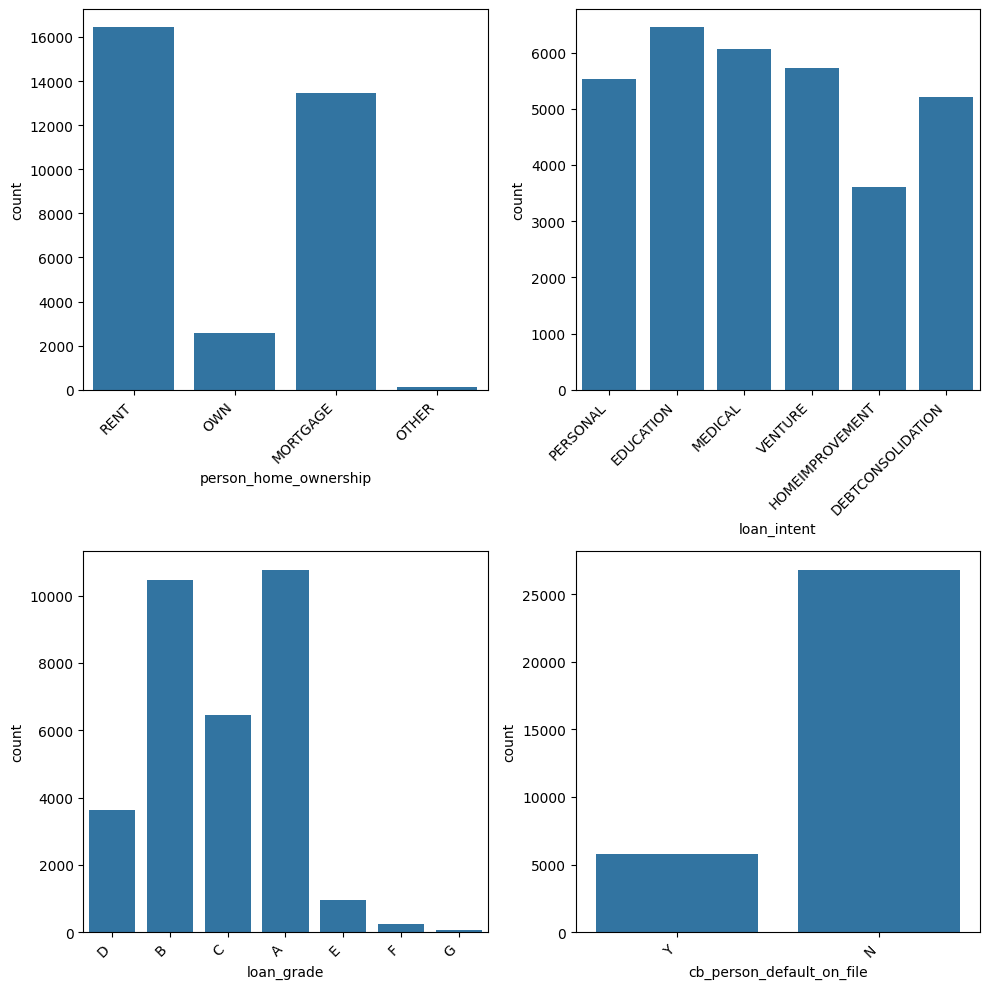

In [153]:
fig, axes = plt.subplots(2,2, figsize=(10,10))  # Ajustar el tamaño de la figura
axes = axes.ravel()

# Realiza una gráfica para cada elemento de variable categórica
for col, ax in zip(df_cat.columns.tolist(), axes):
    
    # Hace un gráfico de barras
    sns.countplot(x=col, data=df_cat, ax=ax)
    
    # Voltea las etiquetas de las variables categóricas para que puedan leerse mejor
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
fig.tight_layout()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

**Respuesta**

`loan_status` 

Se puede observar que los valores de "loan_status" están totalmente concentrados en la parte inferior. Al aplicar el comando "value_counts" nos damos cuenta que sólo existen 2 tipos de valores posibles: 1 & 0, es decir valores binarios (2 posibilidades). Al analizar el conteo de los diferentes valores, nos damos cuenta que tenemos la siguiente frecuencia de valores: 1 -> 7108, 0 -> 25473, por lo que no es extraño ver que la gráfica todo la caja del boxplot está en 0 y el 1 lo interpreta como un outlier. Considero que esta no es la mejor manera de representar este tipo de información, sino con un gráfico de barras. 

En cuanto a interpretación de información, la gráfica nos está diciendo que la mayoría de personas no ha pagado la deuda. Con el método de "value_counts" podemos observar el número exacto de personas que ha pagado y no ha pagado.



`loan_percent_income`

Teniendo en cuenta que la fórmula de loan_percent_income es la siguiente:

 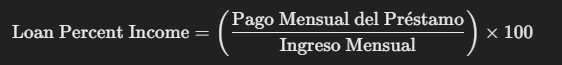

El boxplot de "loan_percent_income" nos indica que el 75% de personas ocupan poco más del 20% de su salario mensual o anual para pagar su préstamo, mientras que poco menos del 25% ocupa casi el 45% de sus ingresos. Así mismo hay personas, que si bien son la minoría ocupan desde el 50% hasta el 85% de su salario aproximadamente. Estas personas son los outliers. 

Si juntamos las deducciones de ambas gráficas nos daremos cuenta de que la mayoría de personas no han podido pagar su préstamo. De aquí tengo varias hipótesis las cuales son: que pidan pagar poco por plazos muy prolongados, y la otra es que no les alcance su sueldo para pagar el préstamo. 

loan_status
0    25473
1     7108
Name: count, dtype: int64

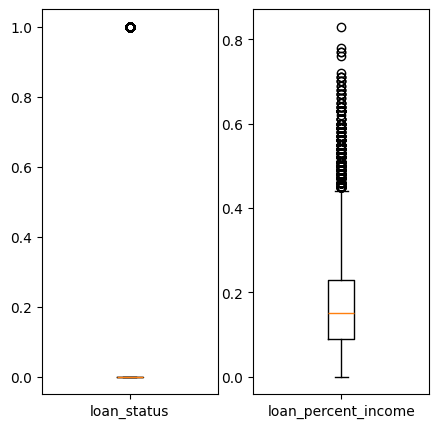

In [154]:
# Graficando "loan_percent_income" y "loan_status" en boxplots
fig, axes = plt.subplots(1,2, figsize=(5,5))
axes = axes.ravel()

axes[0].boxplot(df["loan_status"].dropna(), tick_labels=["loan_status"])
axes[1].boxplot(df["loan_percent_income"].dropna(), tick_labels=["loan_percent_income"])

# Analizando la gráfica de loan status
df["loan_status"].value_counts()


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `loan_status`, utilizando el parámetro `hue`.

C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\2037742495.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\2037742495.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\2037742495.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\amcr0\AppData\Local\Temp\ipykernel_32192\2037742495.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

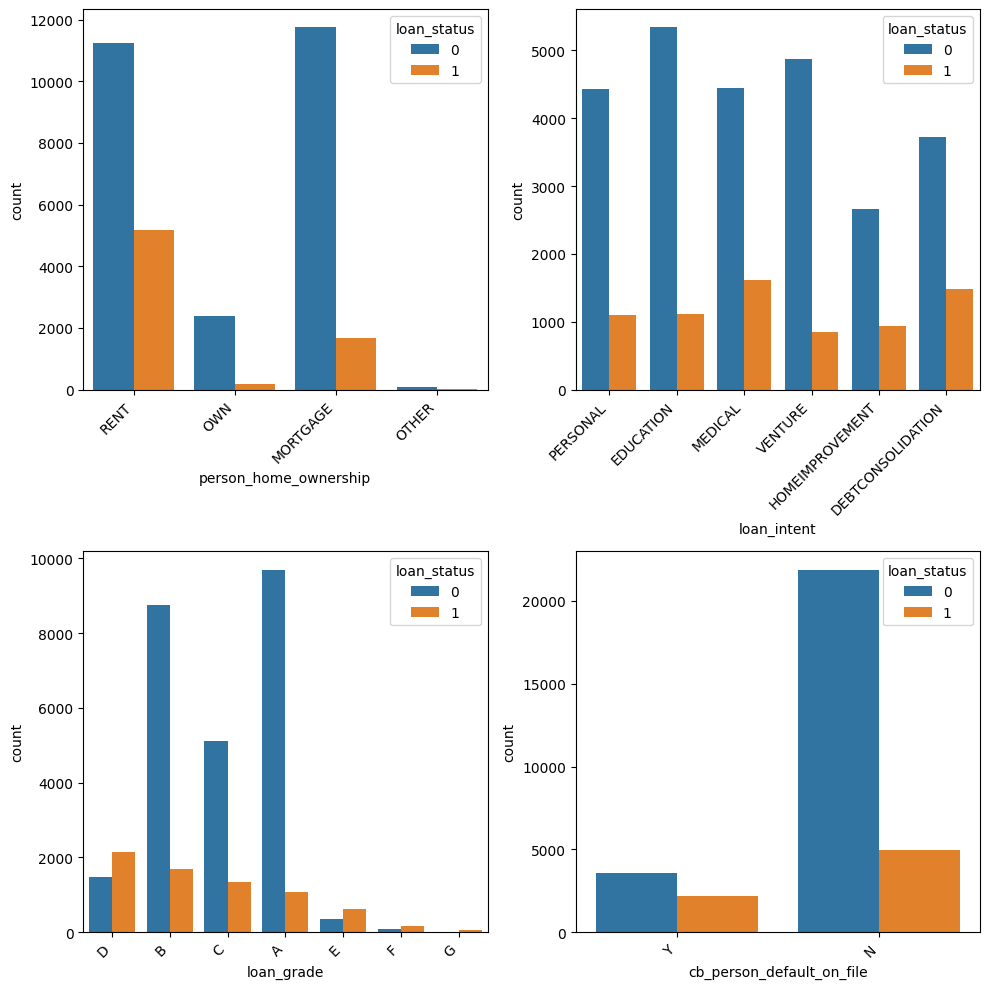

In [155]:
fig, axes = plt.subplots(2,2, figsize=(10,10))  # Ajustar el tamaño de la figura
axes = axes.ravel()

# Realiza una gráfica para cada elemento de variable categórica
for col, ax in zip(df_cat.columns.tolist(), axes):
    
    # Hace un gráfico de barras
    sns.countplot(x=col, data=df_cat, ax=ax, hue=df["loan_status"])
    
    # Voltea las etiquetas de las variables categóricas para que puedan leerse mejor
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
fig.tight_layout()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

**Respuesta**

De acuerdo al mapa de calor, la variable que tiene mayor correlación con "loan_status" sería la variable "loan_percent_income" con un valor de 0.38 positivo. Entre el valor sea más alto y positivo o más cercano a 1, significa que las variables guardan una mayor correlación entre si.

Esto se podría interpretar que las personas pagan más ya terminaron de pagar su deuda, es decir a mayor "loan_percent_income" mayor "loan_status". Lo mismo se puede decir en caso contrario: a menor pago anual o mensual la persona es más problable que no haya temrinado de pagar su deuda (a menor "loan_percent_income" menor "loan_status").

Una correlación de 1 o cercana significa que si la variable X aumenta la variable Y también aumenta en la misma proporción.

Una correlación de 0 o cercana tanto significa que las variables no tienen relación alguna y significa que el cambio de una, no impactará a la otra.

Finalmente una correlación negativa de -1 o cercana, indica que si la varibale X crece Y disminuye en la misma proporción. Lo contrario de la correlación positiva.

<Axes: >

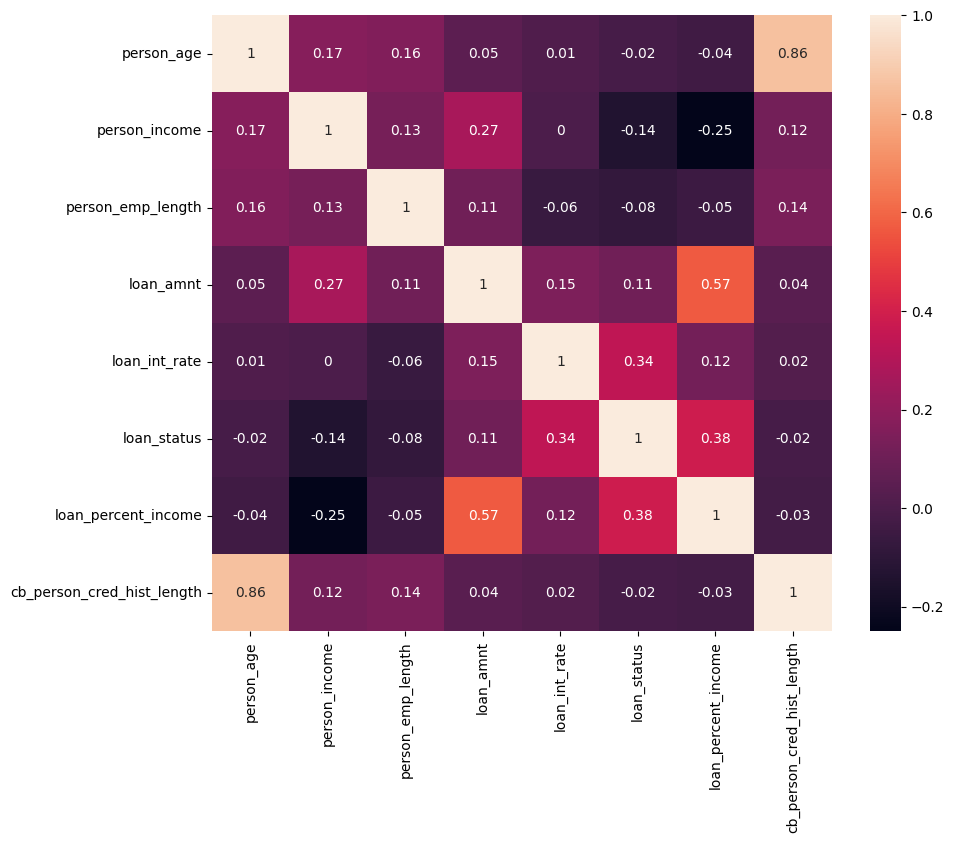

In [156]:
plt.figure(figsize = (10, 8))
sns.heatmap(round(df.corr(numeric_only=True),2), annot = True)